In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
df = pd.read_csv("./BD/202004-divvy-tripdata.csv")
df.head(1)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.661,41.9322,-87.6586,member


In [155]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id        int64
end_station_name       object
end_station_id        float64
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [156]:
# Are there null values?
df.isnull().sum()

ride_id                0
rideable_type          0
started_at             0
ended_at               0
start_station_name     0
start_station_id       0
end_station_name      99
end_station_id        99
start_lat              0
start_lng              0
end_lat               99
end_lng               99
member_casual          0
dtype: int64

There are null values but are a few amount compared whit the dataframe length, in upcoming stages I'll evaluate the best way to deal with that missing data.
______

In [157]:
# Convert the date data to date type instead of object

df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])

df.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id               int64
end_station_name              object
end_station_id               float64
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object

In [158]:
# Creating a column to know the ridint time

df["riding_time"] = df["ended_at"] - df["started_at"]
df.head(1)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,riding_time
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.661,41.9322,-87.6586,member,0 days 00:26:49


# Answers To solve:
- How do annual members and occasional riders differ in their use of Cyclistic bicycles?
- Why would casual cyclists buy Cyclistic annual memberships?
- How can Cyclistic use digital media to influence casual cyclists to become members?

In [185]:
df.member_casual.value_counts()

member    61148
casual    23628
Name: member_casual, dtype: int64

- in the df we have almost 3 times more data from members.

## Looking for differences of both dataframes

In [160]:
df.rideable_type.unique()

array(['docked_bike'], dtype=object)

- Only there is data with "Docked_bike"

In [161]:
df['riding_minutes'] = df['riding_time'].dt.total_seconds() / 60

<Axes: xlabel='riding_minutes', ylabel='Count'>

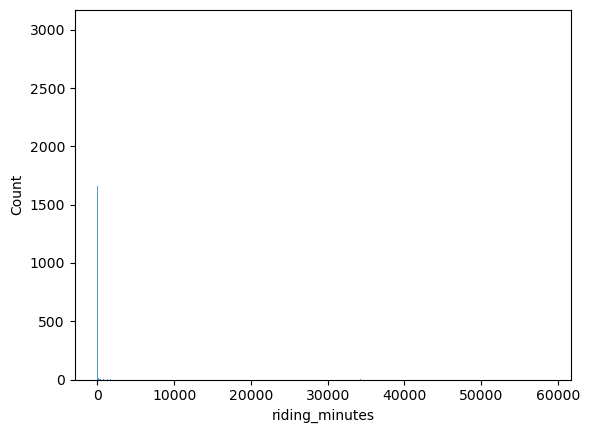

In [162]:
# Looking at the duration in minutes of ridings
sns.histplot(
    data= df["riding_minutes"]
)

- There are a lot of outliers, let's use a logarithmic transformation 

/Users/alphalejo/opt/anaconda3/envs/cyclistic/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/alphalejo/opt/anaconda3/envs/cyclistic/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='log_riding_minutes', ylabel='Count'>

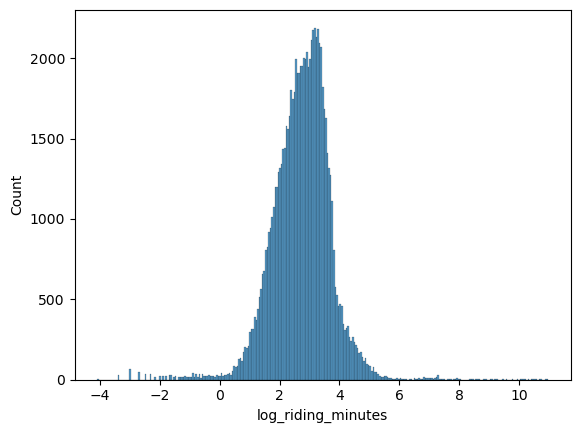

In [163]:
# Applying log convertion to deal with outliers
df["log_riding_minutes"] = np.log(df["riding_minutes"])

sns.histplot(
    data= df["log_riding_minutes"]
)

<Axes: xlabel='member_casual', ylabel='log_riding_minutes'>

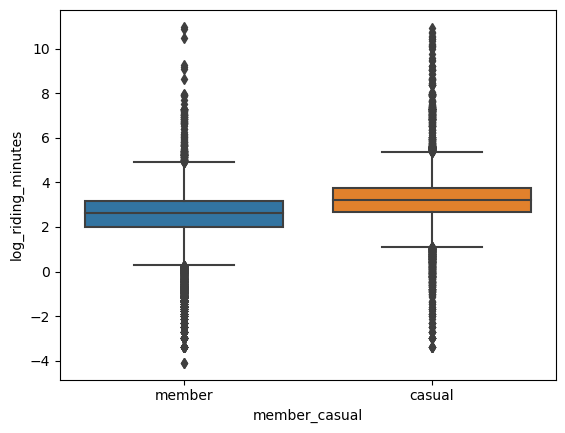

In [164]:
sns.boxplot(
    y= df["log_riding_minutes"],
    x=df["member_casual"]
)

In [190]:
# Selecting only members from the df
members = df.loc[df["member_casual"] == "member"]

# Knowing the main statistical variables
print("median = ", members.riding_minutes.median())
members.riding_minutes.describe()

median =  13.7


count    61148.000000
mean        21.467500
std        364.160603
min         -2.933333
25%          7.450000
50%         13.700000
75%         23.783333
max      58720.033333
Name: riding_minutes, dtype: float64

In [192]:
# Selecting only casual users from the df
casual = df.loc[df["member_casual"] == "casual"]

# Knowing the main statistical variables
print("median = ", casual.riding_minutes.median())
casual.riding_minutes.describe()

median =  25.258333333333333


count    23628.000000
mean        73.071186
std        900.318893
min         -0.550000
25%         14.666667
50%         25.258333
75%         42.770833
max      55683.883333
Name: riding_minutes, dtype: float64

- The casual users used to have longer ridings.

- Also Looks like there are wrong data related with the start and end of riding, since there are negative values, indicating that te ride starts after end, let's see how many rows have wrong values

In [197]:
df["riding_minutes"].loc[df.riding_minutes < 0].count()

51

- there are few corrupted data, for our analysis objective it doesnt affect our resoults so I'll leave the data as it is, with out removing it. 

### Stations

<Axes: xlabel='end_station_id', ylabel='Count'>

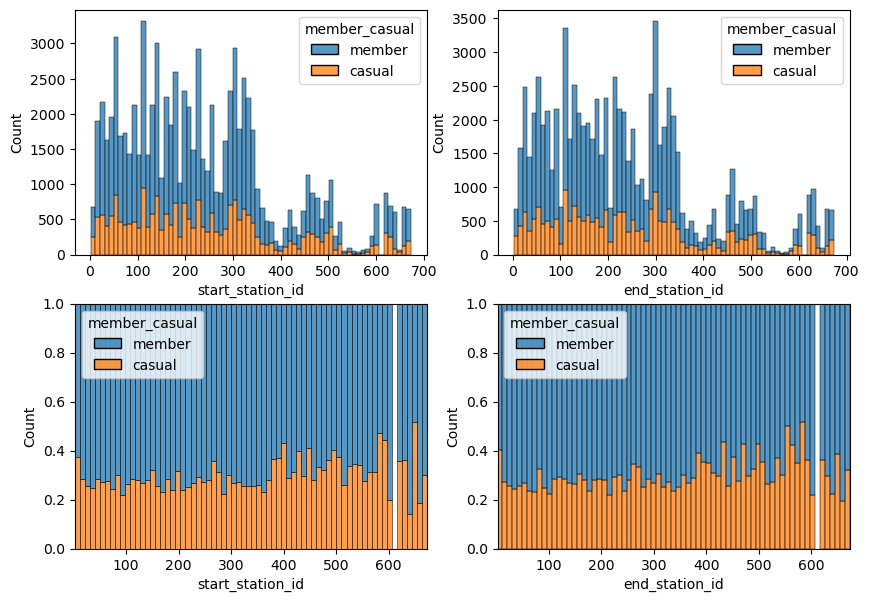

In [182]:
fig, axs = plt.subplots(2,2, figsize=(10,7))

sns.histplot(
    data= df,
    x= "start_station_id",
    hue= "member_casual",
    multiple= "stack",
    ax= axs[0,0]
)

sns.histplot(
    data= df,
    x= "end_station_id",
    hue= "member_casual",
    multiple= "stack",
    ax = axs[0,1]
)

sns.histplot(
    data= df,
    x= "start_station_id",
    hue= "member_casual",
    multiple= "fill",
    ax = axs[1,0]
)

sns.histplot(
    data= df,
    x= "end_station_id",
    hue= "member_casual",
    multiple= "fill",
    ax = axs[1,1]
)

## Answers:

- How do annual members and occasional riders differ in their use of Cyclistic bicycles?:
The only notable difference between members and casual riders is the time that take each trip, casual users have longer trips compared with the members.


- Why would casual cyclists buy Cyclistic annual memberships?:
According to the data analysed, the best incentive should be related with the trip length, maybe better prices for long trips as members or a fixed price when the user exceed some time of use. 


- How can Cyclistic use digital media to influence casual cyclists to become members?:
The dataset doesn't have data to clasiffy the casual users (like ages or user id), so it's necessary additional data to have an accurate answer, However, in my opiniion, the best way would be with discount trough social media or giving some free rides for the suscription.
